In [1]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import pyCalc as p
import random
import math
p.setMode("quiet")

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
#concats copy 
X = np.vstack([img.reshape(-1,) for img in mnist.train.images])
y = mnist.train.labels[:5000]
y.setflags(write=1)
del mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
x_values = []
y_values = []
c = 0
c3 = 0
for i in range(len(y)):
    if y[i] == 3 and c3<200:
        x_values.append(X[i])
        y_values.append(1)
        c3+=1
    elif y[i] != 3 and c<200:
        x_values.append(X[i])
        y_values.append(0)
        c+=1

In [4]:
xs = p.constant(np.array(x_values, dtype=float)) #nx784
ys = p.constant(np.array(y_values, dtype=float)) #nx1

In [5]:
weights =2*np.random.random((784,1)) - 1
ws = p.var("independent", 784,1)

In [6]:
l0 = p.function(xs,ws, "*") #nx1
l1 = p.function(l0, "sigmoid") #nx1
l1_error = p.function(ys.T(), l1, "-")


sig = p.function(l1, "sigmoid_r")
l1_delta = p.function(sig, l1_error, "colwise*")
tmp = p.function(xs.T(),l1_delta, "*")


csh= []
wsh = []
outs =[]

In [7]:
for i in range(2000):
    weights = weights + tmp.value(dict([(ws,weights)]))
    if i%10:
        print(i,"     ", np.sum(l1_error.value()))
    csh.append(np.sum(l1_error.value()))

1       46.3689326262
2       -47.6110235116
3       93.6957115655
4       -70.1484425889
5       58.1922506926
6       -25.6708709361
7       -10.6147237642
8       -19.5741576009
9       -14.1531039443
11       -15.9883815981
12       -6.94656964557
13       -29.3732159295
14       11.5076571108
15       15.8926716652
16       -2.27336219092
17       -14.6830126663
18       -14.7506125995
19       -13.3324799261
21       -10.5839269553
22       1.70189869424
23       -23.1540941482
24       8.41349516954
25       1.94086686726
26       0.0546603214169
27       -10.1580814191
28       -7.68683433644
29       -17.818577248
31       -10.7197866502
32       -11.0252985132
33       -9.94685792895
34       -8.95758340085
35       -8.78463831774
36       -8.9305613114
37       -8.88379928707
38       -8.84781475996
39       -8.7240225415
41       -8.45117099184
42       -7.2389817386
43       -0.242125493362
44       -28.3568907085
45       82.6878099585
46       12.2607951183
47       9.96

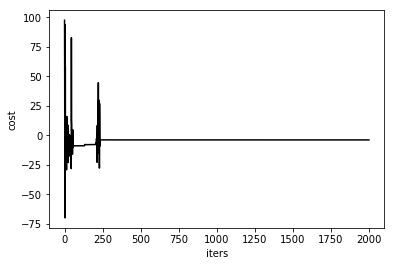

In [8]:
import matplotlib.pyplot as plt
x_data = [i for i in range(len(csh))]
plt.figure(1)
plt.subplot(111)
plt.ylabel('cost')
plt.xlabel('iters')
plt.plot(x_data, csh, 'k')
plt.show()

In [9]:
yy=ys.value()[0]
hh=l1.value()
cor=0
for i in range(len(yy)):
    if yy[i]==0 and hh[i]<0.5:
        cor+=1
    elif yy[i]==1 and hh[i]>0.5:
        cor+=1
print (100*cor/len(yy))
    
    

98.0


In [10]:
ys.value()

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.